## Part 2

Find all the mentions of world countries in the whole corpus, using the pycountry utility (HINT: remember that there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.) Perform sentiment analysis on every email message using the demo methods in the nltk.sentiment.util module. Aggregate the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level) that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# import the csv
df_Emails = pd.read_csv('hillary-clinton-emails/Emails.csv')

In [5]:
import pycountry

In [ ]:
# Trial on how to use pycountry

In [13]:
pycountry.countries.lookup('Switzerland')

Country(alpha_2='CH', alpha_3='CHE', name='Switzerland', numeric='756', official_name='Swiss Confederation')

In [22]:
# Really annoying. When the lookup doesn't find anything it throws an exception !
pycountry.countries.lookup('french')

LookupError: Could not find a record for 'french'

How to tackle the problem : recursively try each country and add a column with each country name per email (list?)

In [20]:
for c in pycountry.countries:
    print(c)

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')
Country(alpha_2='AS', alpha_3='ASM', name='American Samoa', n

In [31]:
df_Emails['countries'] = ""

In [32]:
df_Emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,countries
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,


Let's create a function that will return a list of countries given as input a text.

In [66]:
def detectCountries(text):
    text = text.lower()
    countries = []
    for c in pycountry.countries:
        if c.name.lower() in text:
            countries.append(c.name)
    return countries

In [ ]:
# TODO: This only detect the countries with exactly the same match as in pycountry.countries: can be much better

In [71]:
df_Emails['countries'] = df_Emails['RawText'].apply(detectCountries)

In [72]:
df_Emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,countries
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[]
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Egypt, Spain, France, Israel, Lebanon, Libya,..."
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,[]
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[Egypt]
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[Egypt, Spain, France, Israel, Lebanon, Libya,..."


In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

In [80]:
SIA = SentimentIntensityAnalyzer()

totneg=0
totpos=0
totneu=0

for txt in df_Emails['RawText']:
    token_txt = tokenize.sent_tokenize(txt)

    neg=[]
    pos=[]
    neu=[]
    
    for w in token_txt:
        polarity = SIA.polarity_scores(w)
        
        neg.append(polarity['neg'])
        pos.append(polarity['pos'])
        neu.append(polarity['neu'])
    totneg+=sum(neg)
    totpos+=sum(pos)
    totneu+=sum(neu)

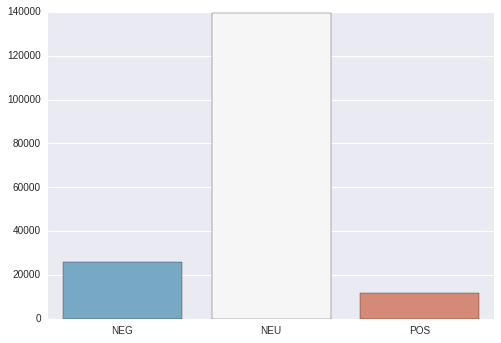

In [89]:
x = ["NEG", "NEU", "POS"]
y = [totneg, totneu, totpos]

sns.barplot(x, y, palette="RdBu_r")

plt.show()

The above graph represent the overall sentimental analysis on the whole mail dataset. It can now be interesting to separate the mails related per country, and plot the results.

A simple way seems to be to calculate those neg/neu/pos values for each mails and add them to the dataframe, we'll then use it for grouping the results per country.

In [106]:
""" extractSentiment is a function to extract the sentiment score apply on a text.
    input: a text as string.
    output: the sums of neg, pos and neu in an array."""
def extractSentiment(text):
    token_txt = tokenize.sent_tokenize(text)

    neg=[]
    pos=[]
    neu=[]
    
    for w in token_txt:
        polarity = SentimentIntensityAnalyzer().polarity_scores(w)
        
        neg.append(polarity['neg'])
        pos.append(polarity['pos'])
        neu.append(polarity['neu'])
    return [sum(neg), sum(pos), sum(neu)]

In [109]:
df_Emails['sentiment'] = df_Emails['RawText'].apply(extractSentiment)

KeyboardInterrupt: 

In [102]:
#df_Emails.drop('sentiments', axis=1, inplace=True)

In [111]:
df_Emails.head(30)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,countries,sentiments
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],"[2.58, 1.403, 11.017]"
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[10.085, 6.092999999999997, 60.825]"
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],"[2.694, 1.049, 12.257000000000001]"
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,"Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[Egypt],"[4.933, 1.4380000000000002, 18.628999999999998]"
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[11.219000000000005, 6.531999999999998, 66.250..."
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,[],"[2.465, 0.696, 10.838999999999999]"
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Afghanistan, Egypt, Iraq, Israel, Libya, Mali...","[8.117, 2.392, 41.49099999999999]"
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[11.09, 6.591999999999999, 66.32000000000001]"
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Dep

Because the computation was heavy we store the result using pickle to avoid having to repeat it.

In [94]:
import pickle

In [95]:
# save the dataframe
pickle.dump( df_Emails, open( "df_Emails.p", "wb" ) )

In [110]:
# load the dataframe
df_Emails = pickle.load( open( "df_Emails.p", "rb" ) )

In [107]:
extractSentiment("I am happy and not sad.")

[0.0, 0.676, 0.324]

In [108]:
extractSentiment("hi there.")

[0.0, 0.0, 1.0]

Let's redo our sentiment analysis on the whole dataset first by using our previously computed values per emails.

In [112]:
import nltk.sentiment.util

Let's separate the sentiments column into 3 distincts

In [147]:
x = df_Emails["sentiments"].tolist()

In [148]:
y = pd.DataFrame(x)

In [150]:
y.head()

,0,1,2
0,2.580,1.403,11.017
1,10.085,6.093,60.825
2,2.694,1.049,12.257
3,4.933,1.438,18.629
4,11.219,6.532,66.251


In [153]:
y.columns = ['pos', 'neg', 'neu']

In [157]:
df = pd.concat([df_Emails, y], axis=1)

In [159]:
df.head(2)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,countries,sentiments,pos,neg,neu
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],"[2.58, 1.403, 11.017]",2.580,1.403,11.017
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[10.085, 6.092999999999997, 60.825]",10.085,6.093,60.825


In [161]:
df.pos.sum()

25774.23399999974

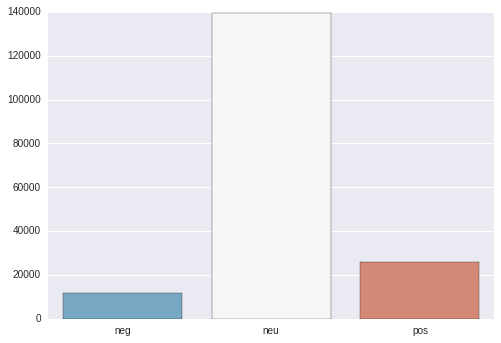

In [162]:
x = ["neg", "neu", "pos"]
y = [df.neg.sum(), df.neu.sum(), df.pos.sum()]

sns.barplot(x, y, palette="RdBu_r")

plt.show()

Let's now calculate those neg/neu/pos scores by country

In [180]:
import itertools

In [187]:
u = set(itertools.chain(*df.countries.tolist())) # unique set of countries used in our mails

In [ ]:
# for each mail containing the c'th country in its country list: add neg/neu/pos

In [ ]:
#TODO: add a comment with bad results involved when taking country shortcuts (i.e. CH, US, ...)

In [189]:
# easier: create a new dataframe adding a row per country for each mail:

In [ ]:
# i.e. [] -> no row, [France, Switzerland] -> 2 rows

In [216]:
df_new

,Id,0
0,2,Egypt
1,2,Spain
2,2,France
3,2,Israel
4,2,Lebanon
5,2,Libya
6,2,Sudan
7,2,Serbia
8,2,Turkey
9,2,United States


In [ ]:
df_new2 = df.groupby('Id').countries.apply(lambda x: pd.DataFrame(x.values[0])).reset_index().drop('level_1', axis = 1)

In [217]:
df_new = df.groupby('Id').countries.apply(lambda x: pd.DataFrame(x.values[0])).reset_index().drop('level_1', axis = 1)

ValueError: No axis named pos for object type <class 'pandas.core.frame.DataFrame'>

In [218]:
df

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,countries,sentiments,pos,neg,neu
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],"[2.58, 1.403, 11.017]",2.580,1.403,11.017
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[10.085, 6.092999999999997, 60.825]",10.085,6.093,60.825
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,[],"[2.694, 1.049, 12.257000000000001]",2.694,1.049,12.257
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,[Egypt],"[4.933, 1.4380000000000002, 18.628999999999998]",4.933,1.438,18.629
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[11.219000000000005, 6.531999999999998, 66.250...",11.219,6.532,66.251
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,...,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,[],"[2.465, 0.696, 10.838999999999999]",2.465,0.696,10.839
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,...,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Afghanistan, Egypt, Iraq, Israel, Libya, Mali...","[8.117, 2.392, 41.49099999999999]",8.117,2.392,41.491
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,...,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"[Egypt, Spain, France, Israel, Lebanon, Libya,...","[11.09, 6.591999999999999, 66.32000000000001]",11.090,6.592,66.320
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,...,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...,"[Libya, Morocco, United States]","[12.468000000000004, 10.809000000000001, 68.72...",12.468,10.809,68.722
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841,...,C05739563,05/13/2015,RELEA